In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.legend as lgd
%matplotlib inline

# load training data
data_frame = pd.read_csv("iris_train.csv", skiprows=1, header=None)
NUM_SAMPLES_TRAIN = data_frame.shape[0]

input_features_train = data_frame.values[:, 0:2]
labels_train = data_frame.values[:, 2]

# define constants
NUM_SAMPLES = input_features_train.shape[0]
NUM_DIMS = input_features_train.shape[1]


In [2]:
X_train = np.concatenate((np.ones((NUM_SAMPLES,1)), input_features_train), axis=1)
y_train = labels_train[:,np.newaxis]

# initialise weights
w = np.zeros((NUM_DIMS+1,1))
wrong_class = NUM_SAMPLES_TRAIN

# run until all samples are correctly classified
while(wrong_class > 0):
    y_pred = np.sign(np.dot(X_train, w))
    wrong_class = np.sum(y_pred != y_train)
    
    for n in range(0, NUM_SAMPLES_TRAIN):
        if(y_pred[n] != y_train[n]):
            delta = np.multiply(X_train[n,:], y_train[n])
            w = w + delta[:,np.newaxis]


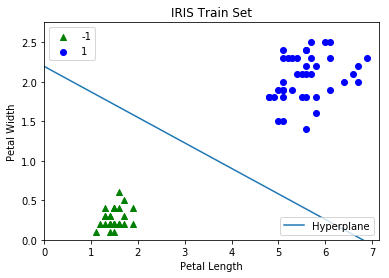

In [3]:
# routine for making scatterplots easier
idx_ones = np.where(y_train == 1)[0]
idx_zeros = np.where(y_train == -1)[0]

input_features_train_ones = input_features_train[idx_ones,:]
input_features_train_zeros = input_features_train[idx_zeros,:]

# plot training set
lo = plt.scatter(input_features_train_zeros[:,0], input_features_train_zeros[:,1], c='g', marker='^')
lt = plt.scatter(input_features_train_ones[:,0], input_features_train_ones[:,1], c='b', marker='o')
#plt.scatter(input_features_train[:,0], input_features_train[:,1], c=labels_train)
plt.xlim(0, max(input_features_train[:,0] + 0.25))
plt.ylim(0, max(input_features_train[:,1] + 0.25))
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(['Hyperplane'])
plt.title('IRIS Train Set')

x_plot = np.linspace(0,7,20)
hyperplane = - w[1] / w[2] * x_plot - w[0] / w[2]
first_lgd = plt.legend((lo, lt), ('-1','1'), loc=2)
plt.plot(x_plot, hyperplane, label='Hyperplane')

ax = plt.gca().add_artist(first_lgd)
plt.legend(loc=4)

plt.savefig('trainset.png')

In [4]:
# load test data
data_frame = pd.read_csv("iris_test.csv", skiprows=1, header=None)
NUM_SAMPLES_TEST = data_frame.shape[0]

input_features_test = data_frame.values[:, 0:2]
labels_test = data_frame.values[:, 2]

Classifier accuracy: 1.0


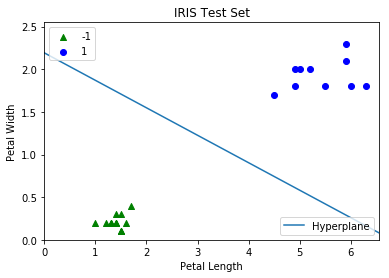

In [5]:
# compute predicted labels values and accuracy
X_test = np.concatenate((np.ones((NUM_SAMPLES_TEST,1)), input_features_test), axis=1)
y_test = labels_test[:,np.newaxis]
y_pred_test = np.sign(np.dot(X_test, w))
accuracy = (NUM_SAMPLES_TEST - np.sum(y_pred_test - y_test)) / NUM_SAMPLES_TEST

idx_ones = np.where(y_test == 1)[0]
idx_zeros = np.where(y_test == -1)[0]

input_features_test_ones = input_features_test[idx_ones,:]
input_features_test_zeros = input_features_test[idx_zeros,:]

# plot training set
lo = plt.scatter(input_features_test_zeros[:,0], input_features_test_zeros[:,1], c='g', marker='^')
lt = plt.scatter(input_features_test_ones[:,0], input_features_test_ones[:,1], c='b', marker='o')
#plt.scatter(input_features_test[:,0], input_features_test[:,1], c=labels_test)
plt.xlim(0, max(input_features_test[:,0] + 0.25))
plt.ylim(0, max(input_features_test[:,1] + 0.25))
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('IRIS Test Set')

x_plot = np.linspace(0,7,20)
hyperplane = - w[1] / w[2] * x_plot - w[0] / w[2]
hp = plt.plot(x_plot, hyperplane, label='Hyperplane')
first_lgd = plt.legend((lo, lt), ('-1','1'), loc=2)

ax = plt.gca().add_artist(first_lgd)
plt.legend(loc=4)

print("Classifier accuracy: {}".format( accuracy))

plt.savefig('testset.png')

In [ ]:
w

In [ ]:
idx_ones = np.where(y_test == 1)[0]

In [ ]:
idx_ones[2]